In [1]:
import numpy as np
import scipy as sp
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  


## Consumption Growth Function ##

$ln({\tilde{g}}) = 0.02 + 0.02{\tilde{\epsilon}} + {\tilde{\nu}}$

${\tilde{\epsilon}}$ is a standard normal random variable.

${\tilde{\nu}}$ is is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

In [7]:
no_of_draws = 100000

In [11]:
epsilon = np.random.standard_normal(no_of_draws)
epsilon

array([-1.25135639, -1.10471995, -0.90261343, ...,  0.35446512,
       -0.9117232 ,  0.61876014])

In [14]:
nu = np.random.uniform(0,1,no_of_draws)  
for idx,elem in enumerate(nu):
    if elem <= 0.17 :
        nu[idx] = np.log(0.65)
    else:
        nu[idx] = 0


In [19]:
epsilon_nu_pair = list(zip(epsilon,nu))

In [38]:
g = []
for idx,elem in enumerate(epsilon_nu_pair):
    g.append(np.exp(0.02 + 0.02 * elem[0] + elem[1]))

In [39]:
g

[0.9949854870576942,
 0.9979077927737372,
 1.0019496295290706,
 1.056720117509905,
 0.6562562966386845,
 1.0013647471972287,
 1.0286260892086776,
 0.9998134072084922,
 1.024146647726393,
 1.011977900216645,
 1.0550423779233309,
 0.6584943493057228,
 1.0347245106860268,
 1.0072291488317346,
 1.0186362791628203,
 1.0079384513471257,
 1.0379143893290832,
 1.013853676971651,
 0.6257287679792733,
 1.010553382259817,
 0.6682796015445923,
 1.0372240302187714,
 0.6572884591182289,
 1.0145703252398792,
 1.0415033426767017,
 1.0238251645452838,
 0.6681301878646992,
 1.0434223356420587,
 1.017992609498494,
 0.9958334631303821,
 1.0216141067998425,
 1.0037196180028263,
 0.6712186969299777,
 1.02405336194196,
 0.9892210753669993,
 0.6608492949925491,
 1.003548152578713,
 1.0031281662220117,
 1.050687716537306,
 1.052160618681382,
 1.012162288549385,
 1.0012667065310623,
 1.0335252565646789,
 1.0433092202771974,
 1.033704108043989,
 0.6510659016751855,
 1.0064404622218759,
 1.052629957853753,
 0.665

## Pricing kernel for power utility ##
${\tilde{M}} =  0.99 {\tilde{g}}^{-\gamma}$

In [33]:
gamma = np.arange(1,4.1,0.10)

In [68]:
m_des_dict = {}
for possible_gamma in gamma:
    m = []
    for possible_g in g:
        m.append(0.99 * possible_g ** -possible_gamma)
    m=np.array(m)
    m_des_dict[round(possible_gamma,2)] = (m.std()/m.mean())
    

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'dict_keys'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


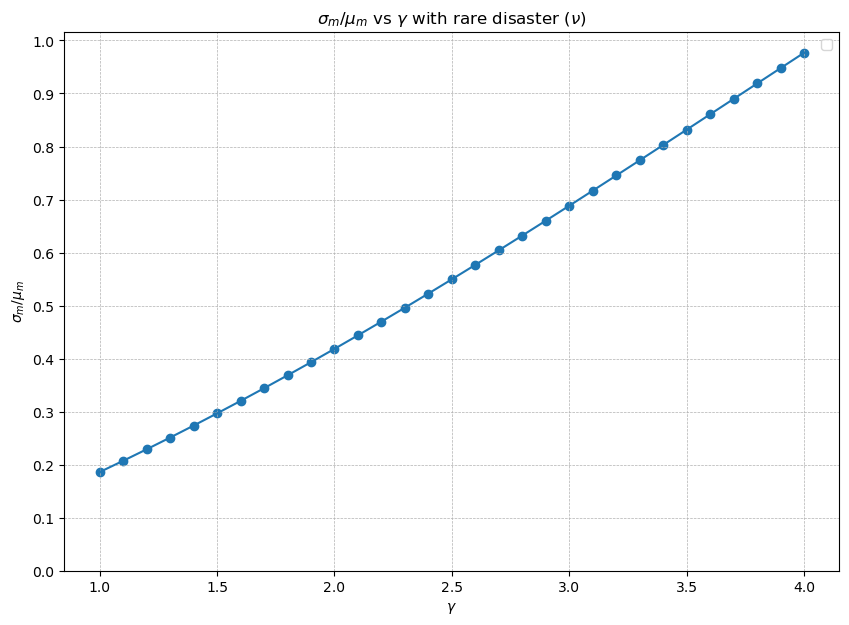

In [78]:
f1, ax1 = plt.subplots(1)
f1.set_figheight(7)
f1.set_figwidth(10)
ax1.scatter(m_des_dict.keys(), m_des_dict.values())
ax1.plot(m_des_dict.keys(), m_des_dict.values())
ax1.set_ylim(ymin=0)
#ax1.set_xlim(xmin=0)
ax1.set_xlabel(r"$\gamma$")
ax1.set_ylabel(r"$\sigma_m/\mu_m$")
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.025))
ax1.set_title(r"$\sigma_m/\mu_m$ vs $\gamma$ with rare disaster ($\nu$)")
ax1.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f %%"))
ax1.grid(linestyle = '--', linewidth = 0.5)
ax1.legend()
plt.show(f1)
f1.savefig('f1.jpg')

In [98]:
min_gamma = 5 #because max gamma is 4
for gamma,val in m_des_dict.items():
    if val > 0.4:
        if int(gamma) < min_gamma:
            min_gamma = int(gamma)
            print(f'minimum gamma is {min_gamma} with value equals {round(val,4)}')
            break

minimum gamma is 2 with value equals 0.4184


In [92]:
min_gamm

2